<a href="https://colab.research.google.com/github/nick-d-james/academic-writing/blob/master/neural_networks_manifolds_topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chris Olah's *Neural Networks, Manifolds, and Topology*
              Nick D. James, PhD
        The Ottawa Hospital - Systems Architecture
---

## A Simple Example
<img src="https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/simple2_linear.png" alt="Drawing" width="210"/>

- Two input features: $(x_1, x_2) \in \mathbb R^2$
- Binary ground truth: red (negative), blue (positive)

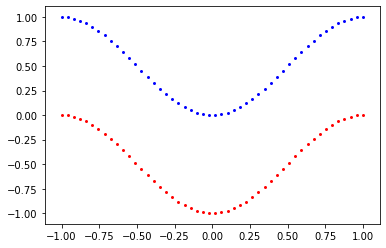

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def create_cos_curve_points(n_points=200, mean=0.0, offset=0.0, amplitude=0.5, noise_std_dev=0.1):
  return np.asarray([(x, amplitude * (np.random.normal(scale=noise_std_dev) - np.cos(np.pi * x) + offset)) for x in np.random.uniform(-1, 1, size=[n_points])]) 

def create_perfect_cos_curve_points(n_points=50, mean=0.0, offset=0.0, amplitude=0.5, noise_std_dev=0.1):
  return np.asarray([(x, amplitude * (np.random.normal(scale=noise_std_dev) - np.cos(np.pi * x) + offset)) for x in np.linspace(-1, 1, num=n_points)]) 

# blue_points = create_cos_curve_points(offset=1)
# red_points = create_cos_curve_points(offset=-1)
blue_points = create_perfect_cos_curve_points(offset=1, noise_std_dev=0)
red_points = create_perfect_cos_curve_points(offset=-1, noise_std_dev=0)

plt.scatter(blue_points[:,0], blue_points[:,1], color='blue', marker='.', linewidths=0)
plt.scatter(red_points[:,0], red_points[:,1], color='red', marker='.', linewidths=0)
plt.show()

In [8]:
X = np.concatenate([blue_points, red_points], axis=0)
y = np.concatenate([np.ones(shape=(blue_points.shape[0],)), 
                    np.zeros(shape=(red_points.shape[0],))])
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (100, 2)
y.shape = (100,)


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

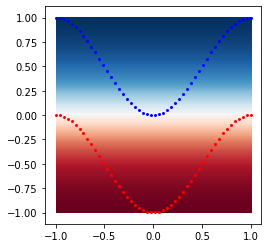

In [6]:
test_points = [(xx, yy) for yy in np.linspace(1, -1, num=400) for xx in np.linspace(-1, 1, num=400)]
y_hat = logreg.predict_proba(test_points)[:,1].reshape(400,400)
plt.imshow(y_hat, cmap='RdBu', extent=(-1, 1, -1, 1))
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue', marker='.', linewidths=0)
plt.scatter(red_points[:,0], red_points[:,1], color='red', marker='.', linewidths=0)
plt.show()

In [68]:
test_points[400]

(-1.0, 0.9949874686716792)

In [21]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=())
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:
print("{} layers, {} outputs".format(model.n_layers_, model.n_outputs_))
print(model.coefs_)
model.intercepts_

2 layers, 1 outputs
[array([[0.15813274],
       [0.53427523]])]


[array([-0.40997676])]

In [0]:
y_hat = model.predict_proba(grid)[:,1]

In [52]:
len(grid)

160000

In [0]:
y_hat = y_hat.reshape(400,400)

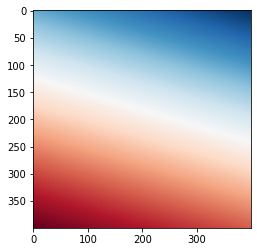

In [56]:
plt.imshow(y_hat, cmap='RdBu')

In [9]:
sklearn.show_versions()


System:
    python: 3.6.9 (default, Nov  7 2019, 10:44:02)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 45.2.0
   sklearn: 0.22.1
     numpy: 1.17.5
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 0.25.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [12]:
model.hidden_layer_sizes

()